regression model - Random Forest Regressor

In [ ]:
"""
#Predicted Total Returns for 2025: 143,542

First idea:
Train incrementally using data windows
Train on 1985–1994 → test on 1995 
Train on 1985–1995 → test on 1996 
Train on 1985–1996 → test on 1997 
...
Train on 1985–2022 → test on 2023 
Train on 1985–2023 → test on 2024 
Then predict 2025 


Models:
#>>> Random Forest Regressor

Neural Network (NN)
XGBoost Regressor
Linear Regression


Time-Series Cross-Validation Strategy
    sklearn.model_selection.TimeSeriesSplit
"""

In [1]:
# Load cleaned dataset with ReturnYear + ReturnCount
import pandas as pd
df = pd.read_csv('Cleaned_2Columbia_Return.csv')  
df.columns = df.columns.str.strip()  # remove extra spaces

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Prepare your DataFrame
df = df[['ReturnYear', 'ReturnCount']].copy()
df['Year'] = df['ReturnYear']  # Use year as a numerical feature

results = []

for i in range(10, len(df)-1): # Start from 10 years of data
    train = df.iloc[:i] # Training data up to year i
    test = df.iloc[i:i+1] # Testing data for the next year

    X_train = train[['Year']]  # Year as feature
    y_train = train['ReturnCount'] # Target variable
    X_test = test[['Year']] # Year as feature
    y_test = test['ReturnCount'] # Target variable

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)[0]
    actual = y_test.values[0]
    year = test['ReturnYear'].values[0]

    results.append({'Year': year, 'Predicted': pred, 'Actual': actual})

# Save result history
results_df = pd.DataFrame(results)
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']

# Predict 2025 using full data
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(df[['Year']], df['ReturnCount'])
pred_2025 = final_model.predict([[2025]])[0]

print(results_df.tail())
print(f"\n📌 Predicted Total Returns for 2025: {int(pred_2025):,}")


     Year      Predicted  Actual     Difference
184  2023   89520.424348       0  -89520.424348
185  2024   70005.992428   11687  -58318.992428
186  2024   32702.942649  715817  683114.057351
187  2024  345490.991976   28205 -317285.991976
188  2024  232434.346857     200 -232234.346857

📌 Predicted Total Returns for 2025: 143,542


c:\Users\MuriloFarias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
df

In [ ]:
for lag in range(1, 6):
    df[f'Returns_Lag_{lag}'] = df['ReturnCount'].shift(lag)

df = df.dropna().reset_index(drop=True)


In [ ]:
df

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

results = []
years = df['ReturnYear'].tolist()

for i in range(10, len(df)-1):
    train = df.iloc[:i]
    test = df.iloc[i:i+1]

    X_train = train.drop(columns=['ReturnYear', 'ReturnCount'])
    y_train = train['ReturnCount']
    X_test = test.drop(columns=['ReturnYear', 'ReturnCount'])
    y_test = test['ReturnCount']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)[0]
    actual = y_test.values[0]
    year = test['ReturnYear'].values[0]

    results.append({'Year': year, 'Predicted': pred, 'Actual': actual})

results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
results_df

In [ ]:
results_df['Difference'] = results_df['Actual'] - results_df['Predicted']

In [3]:
results_df

,Year,Predicted,Actual,Difference
0,1987,11571.923107,22999,11427.076893
1,1987,18501.410690,78578,60076.589310
2,1987,49932.729706,15416,-34516.729706
3,1987,38546.592750,0,-38546.592750
4,1987,28124.143270,0,-28124.143270
...,...,...,...,...
184,2023,89520.424348,0,-89520.424348
185,2024,70005.992428,11687,-58318.992428
186,2024,32702.942649,715817,683114.057351
187,2024,345490.991976,28205,-317285.991976


In [4]:
yearly_sum = results_df.groupby('Year')[['Predicted', 'Actual', 'Difference']].sum().reset_index()
print(yearly_sum)


    Year      Predicted  Actual     Difference
0   1987  146676.799524  116993  -29683.799524
1   1988  102740.589044   79713  -23027.589044
2   1989   57623.621520   41885  -15738.621520
3   1990   59906.180071   49581  -10325.180071
4   1991   92991.742253   76481  -16510.742253
5   1992  103548.309339   84992  -18556.309339
6   1993  104113.930731   80177  -23936.930731
7   1994   33982.423262   12677  -21305.423262
8   1995   13516.417036    8732   -4784.417036
9   1996   32979.909119   30233   -2746.909119
10  1997   54500.970017   47009   -7491.970017
11  1998   25491.995187   13219  -12272.995187
12  1999   23579.149099   17876   -5703.149099
13  2000  100314.227988   93398   -6916.227988
14  2001  137776.334377  114934  -22842.334377
15  2002   74724.717159   49419  -25305.717159
16  2003   52410.886940   37376  -15034.886940
17  2004  131893.071832  123290   -8603.071832
18  2005  109275.089271   72822  -36453.089271
19  2006   48287.012440   37066  -11221.012440
20  2007   38

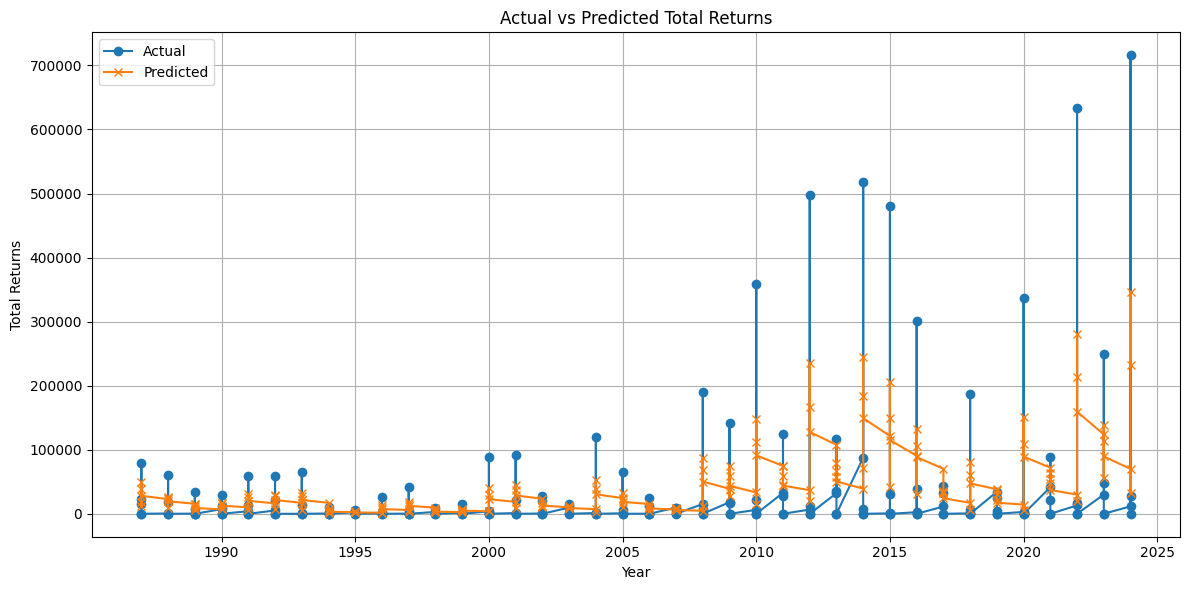

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results_df['Year'], results_df['Actual'], label='Actual', marker='o')
plt.plot(results_df['Year'], results_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Total Returns')
plt.xlabel('Year')
plt.ylabel('Total Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


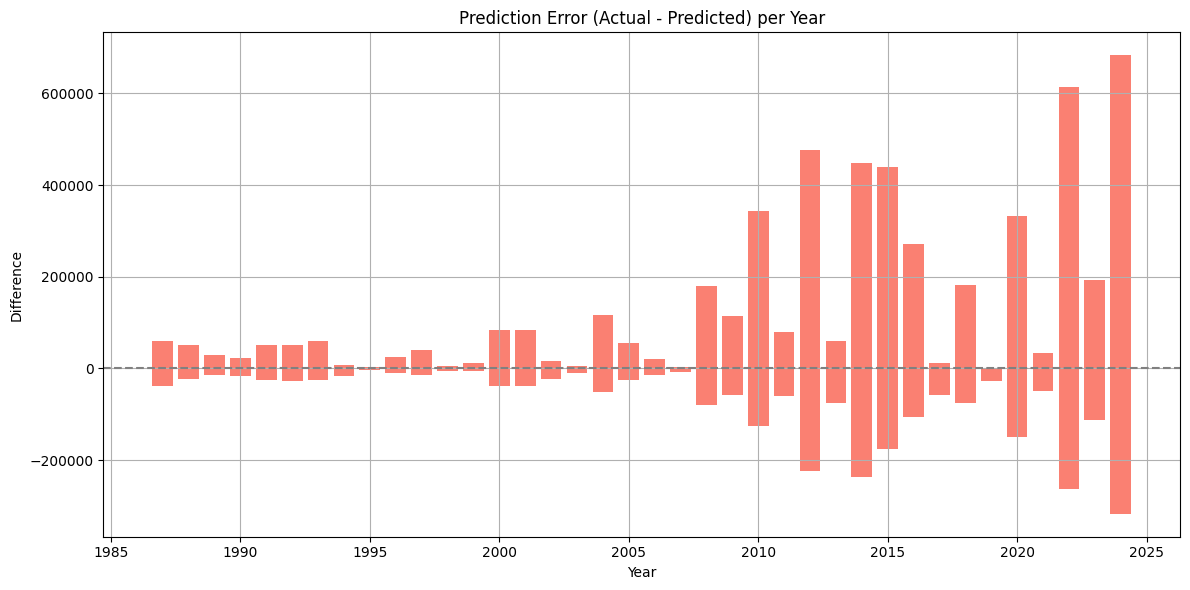

In [6]:
plt.figure(figsize=(12, 6))
plt.bar(results_df['Year'], results_df['Difference'], color='salmon')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Prediction Error (Actual - Predicted) per Year')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.grid(True)
plt.tight_layout()
plt.show()


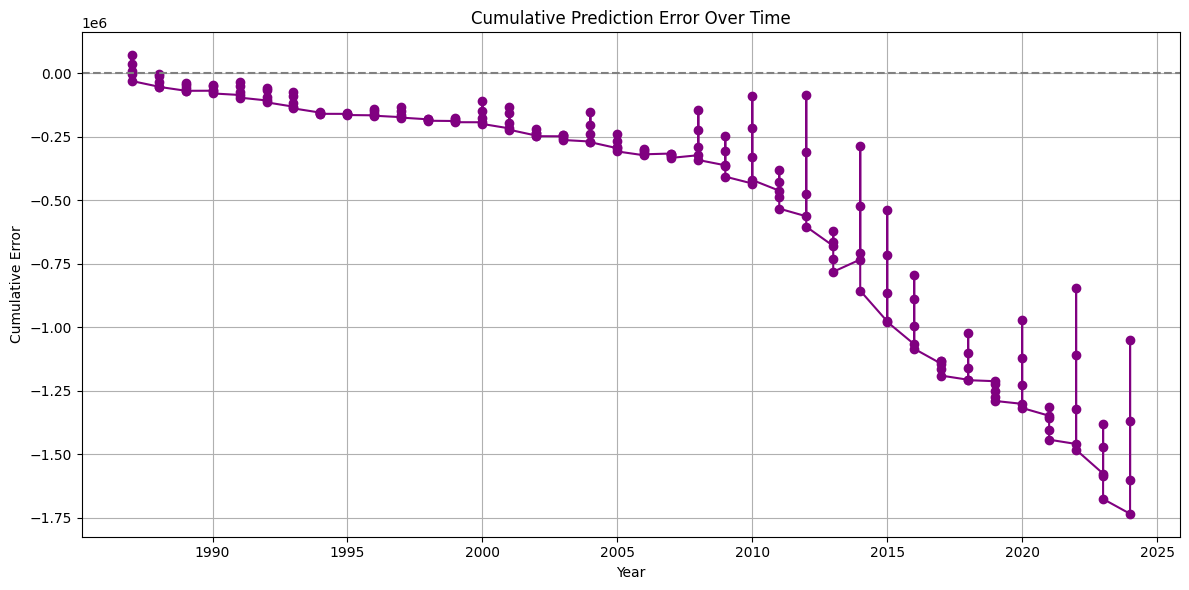

In [7]:
results_df['Cumulative_Error'] = results_df['Difference'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(results_df['Year'], results_df['Cumulative_Error'], color='purple', marker='o')
plt.axhline(0, linestyle='--', color='gray')
plt.title('Cumulative Prediction Error Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Error')
plt.grid(True)
plt.tight_layout()
plt.show()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_scaled, y_train, epochs=100, verbose=0)
